In [33]:
import pandas as pd
import os
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt

### Get the list of all the state representatives

In [34]:
f = open('./state_reps/state_reps.txt', 'r')
state_reps = []
for line in f:
    if line.split('\t')[1] == "Vacant":
        continue
    state_reps.append(line.split('\t')[1])
f.close()

### Read the filtered dataframe csv

In [35]:
healthcare_data = pd.read_csv('./output_2.csv')

In [146]:
updated_df = pd.read_csv('updated_df.csv')

In [63]:
healthcare_data.shape

(282111, 21)

## Max Donors

In [102]:
names = healthcare_data.groupby(['Last_Name'], as_index=False).sum().sort_values(['Amount'], ascending=False)[:5]['Last_Name'].to_numpy()
amounts = healthcare_data.groupby(['Last_Name'], as_index=False).sum().sort_values(['Amount'], ascending=False)[:5]['Amount'].to_numpy()

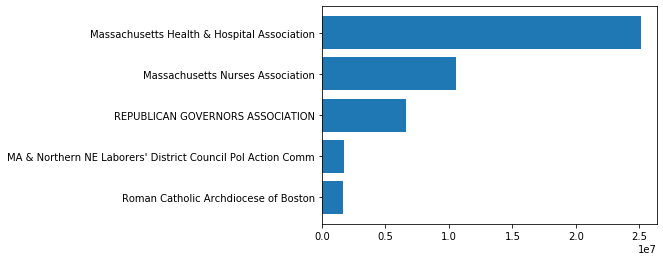

In [103]:
fig, ax = plt.subplots()
ax.barh(names, amounts, align='center')
ax.invert_yaxis()
plt.show()

### State Reps Analysis

In [36]:
def check_reps(df_val):
    if '.' in df_val:
        try:
            df_val = df_val.split('.')[0].split(' ')[0] + ' ' + df_val.split('. ')[1]
        except:
            pass
    for i in state_reps:
        i = i.lower().strip(' \n')
        df_val = df_val.lower().strip(' \n')
        if fuzz.ratio(i, df_val) >= 95:
            return True
state_reps_donations = healthcare_data[healthcare_data['Full_Name'].apply(check_reps) == True]

In [37]:
total_rep_donations = state_reps_donations.groupby(['Full_Name'], as_index=False).sum().sort_values(['Amount'], ascending=False)

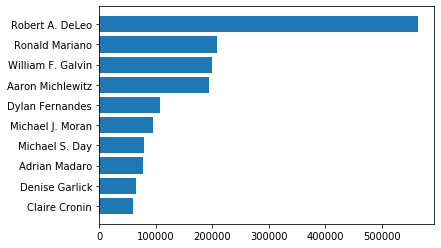

In [157]:
names = total_rep_donations[:10]['Full_Name'].to_numpy()
amounts = total_rep_donations[:10]['Amount'].to_numpy()
fig, ax = plt.subplots()
ax.barh(names, amounts, align='center')
ax.invert_yaxis()
plt.show()

In [128]:
healthcare_data[healthcare_data['Full_Name'] == 'Robert A. DeLeo'].sort_values(['Amount'], ascending=False)

,Unnamed: 0,Unnamed: 0.1,ID,Report_ID,Date,Contributor_Type,First_Name,Last_Name,Address,City,...,Zip,Occupation,Employer,Contributor_ID,Amount,Full_Name,Comm_Name,Report_Year,CPF_ID,Filing_Date
33894,162926,162926,11912797,598971,2016-11-21,Individual,Peter,Mastrangelo,13 Ross Ln,Middleton,...,01949-1418,CFO,Harmony Healthcare International,NaN,1500.0,Robert A. DeLeo,DeLeo Committee,2016,11413,2017-01-20 08:05:48.110
90382,528455,528455,12690861,667816,2018-07-17,Individual,Andrew L.,Salmon,5 Bella Rosa Dr,Millbury,...,01527-1452,Director of Network Development,Salmon Health & Retirement,NaN,1000.0,Robert A. DeLeo,DeLeo Committee,2018,11413,2018-08-27 09:35:27.270
113532,637796,637796,13019425,685762,2018-12-31,Individual,Nina,Blumenthal,232 Rock Odundee Rd,South Dartmouth,...,02748-1428,Physician,Nina Blumenthal,NaN,1000.0,Robert A. DeLeo,DeLeo Committee,2018,11413,2019-01-22 07:18:54.737
61532,386730,386730,12409604,642943,2017-11-28,Individual,Peter K.,Markell,73 Churchills Ln,Milton,...,02186-3522,CFO,Partners Healthcare,NaN,1000.0,Robert A. DeLeo,DeLeo Committee,2017,11413,2018-01-22 14:40:43.657
154442,779932,779932,13279158,705114,2019-03-26,Individual,John J.,Carroll Jr.,297 Heaths Bridge Rd,Concord,...,01742-4946,Attorney,"Meehan, Boyles, Blank & Bogdono",NaN,1000.0,Robert A. DeLeo,DeLeo Committee,2019,11413,2019-07-22 13:41:11.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61409,386243,386243,12409153,642943,2017-10-04,Individual,Martha R.,Bagley Esq,"84 State St, Ste 11",Boston,...,02109-2214,Attorney,Martha R. Bagley Law Offices,NaN,50.0,Robert A. DeLeo,DeLeo Committee,2017,11413,2018-01-22 14:40:43.657
33855,162832,162832,11912703,598971,2016-10-26,Individual,Carla Tacelli,DiRuzza,115 Lincoln St,Revere,...,02151-5709,Attorney,Needham Bank,NaN,50.0,Robert A. DeLeo,DeLeo Committee,2016,11413,2017-01-20 08:05:48.110
274436,1013045,1013045,13644385,727729,2019-10-16,Individual,Barbara,Bornstein,311 Village Dr,Sugar Land,...,77498-3047,Retired,Retired,NaN,25.0,Robert A. DeLeo,DeLeo Committee,2019,11413,2020-01-21 15:11:19.093
274471,1013236,1013236,13644576,727729,2019-12-10,Individual,Andrea A.,Harney,"3 Seal Harbor Rd, Apt 236",Winthrop,...,02152-1086,Homemaker,At Home,NaN,25.0,Robert A. DeLeo,DeLeo Committee,2019,11413,2020-01-21 15:11:19.093


In [66]:
total_rep_donations[:20]

,Full_Name,Unnamed: 0,Unnamed: 0.1,ID,Report_ID,Contributor_ID,Amount,Report_Year,CPF_ID
106,Robert A. DeLeo,908037278,908037278,24692502036,1282118048,992980.0,563638.00,3964292,22426545
107,Ronald Mariano,427545213,427545213,8321514719,438362477,1929270.0,208717.00,1291448,7758080
131,William F. Galvin,225882042,225882042,5998195117,311781898,3136691.0,200100.00,962511,4853952
0,Aaron Michlewitz,505910252,505910252,8823370592,467153307,2334276.0,194400.00,1345893,9939634
42,Dylan Fernandes,225230767,225230767,8441194775,432109871,1167190.0,108062.00,1389627,11304423
88,Michael J. Moran,210481216,210481216,4452464335,233470135,1770249.0,94525.00,698134,4376900
90,Michael S. Day,175316800,175316800,3584794916,187747897,1125531.0,78440.00,560815,4163050
2,Adrian Madaro,250505830,250505830,5327186521,279793207,1460965.0,78037.00,835326,6596676
38,Denise Garlick,133627496,133627496,2968413429,155236277,2172927.0,65613.00,468098,3493224
23,Claire Cronin,132320179,132320179,2830206804,148348815,1287102.0,59521.00,443976,3397680


## Donations over the years for each state rep

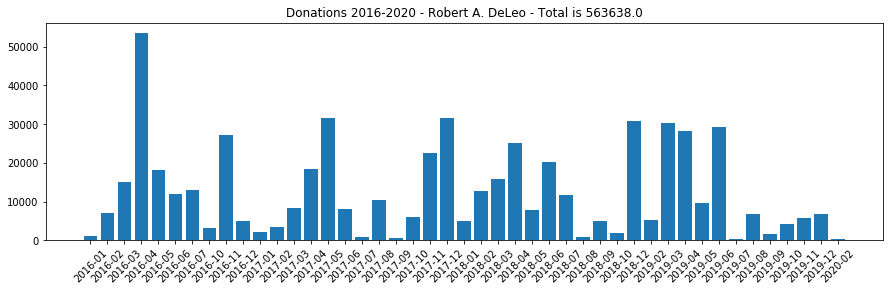

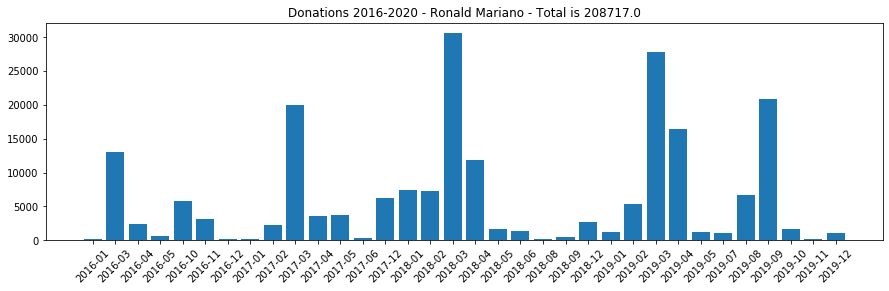

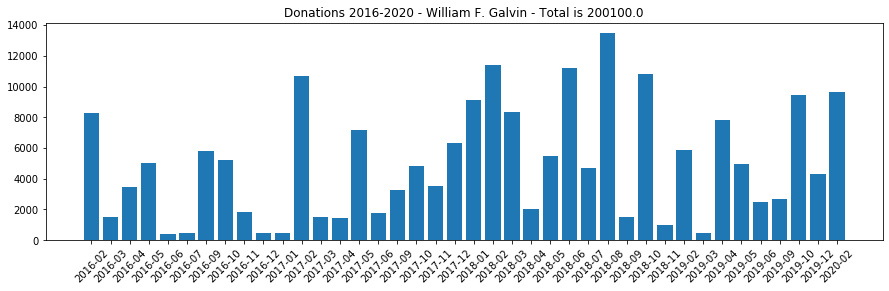

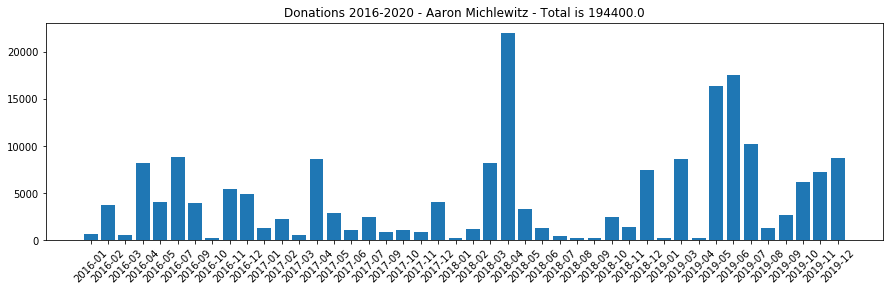

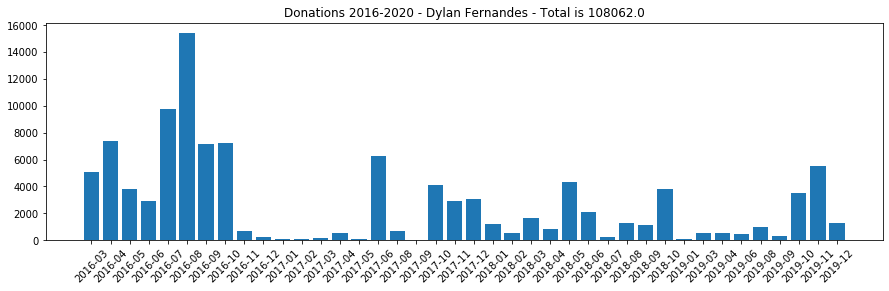

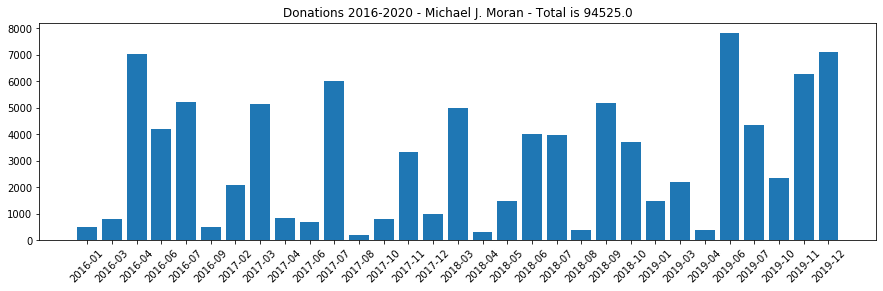

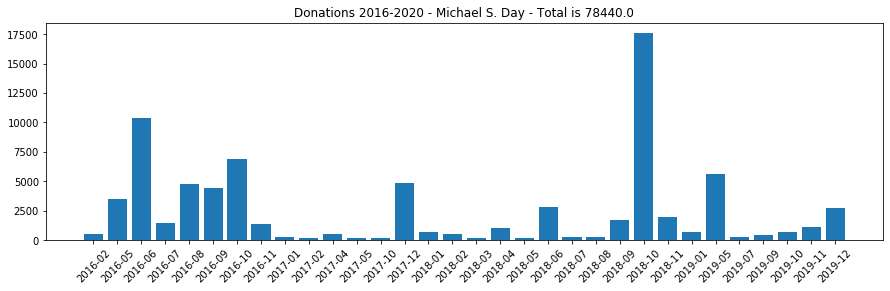

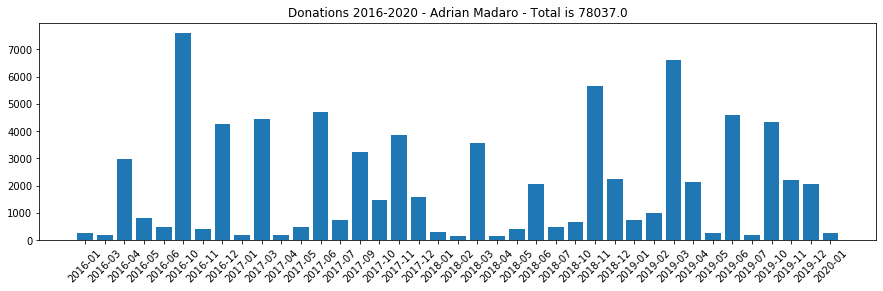

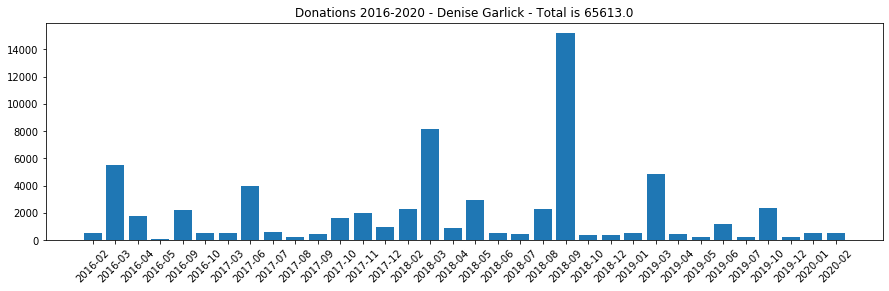

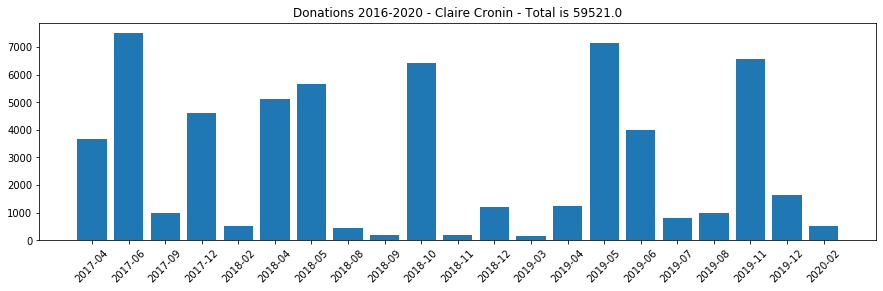

In [158]:
def plot_donations_years(data, rep):
    amounts = data[data['Full_Name'] == rep]['Amount'].to_numpy()
    dates = data[data['Full_Name'] == rep]['Date'].to_numpy()
    amount_dict = {}
    total = 0
    for i in range(len(dates)):
        date_sub = dates[i].split('-')[0] + '-' + dates[i].split('-')[1]
        if date_sub not in amount_dict:
            amount_dict[date_sub] = 0
        total += float(amounts[i])
        amount_dict[date_sub] += float(amounts[i])
    x = []
    y = []
    vals = list(amount_dict)
    def custom_sort(a):
        return int(a.split('-')[0]) * 100 + int(a.split('-')[1])
    x = sorted(vals, key=custom_sort)
    for i in x:
        y.append(amount_dict[i])
    plt.figure(1, figsize=(15, 4))
    plt.bar(x, y)
    plt.xticks(x, rotation='45')
    plt.title('Donations 2016-2020 - ' + rep + ' - Total is ' + str(total))
    plt.show()

for i in names:
    plot_donations_years(state_reps_donations, i)
# rep = 'Ronald Mariano'
# plot_donations_years(state_reps_donations, rep)
# rep = 'Robert A. DeLeo'
# plot_donations_years(state_reps_donations, rep)


### Individual analysis - Recipients

In [71]:
total_donations_recipient = healthcare_data.groupby(['Full_Name'], as_index=False).sum().sort_values(['Amount'], ascending=False)

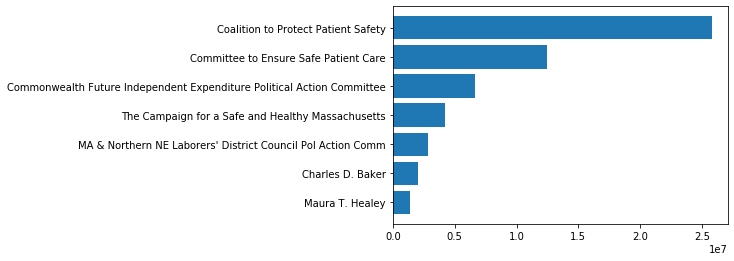

In [106]:
names = total_donations_recipient[:7]['Full_Name'].to_numpy()
amounts = total_donations_recipient[:7]['Amount'].to_numpy()
fig, ax = plt.subplots()
ax.barh(names, amounts, align='center')
ax.invert_yaxis()
plt.show()

### Individual analysis - Donors

In [74]:
total_donations_donor = healthcare_data.groupby(['Last_Name'], as_index=False).sum().sort_values(['Amount'], ascending=False)

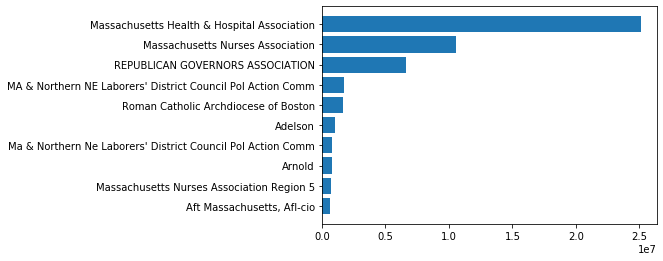

In [107]:
names = total_donations_donor[:10]['Last_Name'].to_numpy()
amounts = total_donations_donor[:10]['Amount'].to_numpy()
fig, ax = plt.subplots()
ax.barh(names, amounts, align='center')
ax.invert_yaxis()
plt.show()

In [13]:
import numpy as np
healthcare_data = healthcare_data.replace(np.nan, '', regex=True)
healthcare_data_donor_consolidated = pd.DataFrame(columns = ['Donor_Name', 'Amount_Donated', 'Candidate_Received', 'Date'])
healthcare_data_recipient_consolidated = pd.DataFrame(columns = ['Candidate_Name', 'Amount_Received', 'Donor_Name', 'Date'])

In [15]:
healthcare_data_donor_consolidated["Donor_Name"] = healthcare_data["First_Name"] + ' ' + healthcare_data["Last_Name"]
healthcare_data_donor_consolidated["Donor_Name"] = healthcare_data_donor_consolidated["Donor_Name"].str.title()
healthcare_data_donor_consolidated["Amount_Donated"] = healthcare_data["Amount"]
healthcare_data_donor_consolidated["Candidate_Received"] = healthcare_data["Full_Name"]
healthcare_data_donor_consolidated["Date"] = healthcare_data["Date"]

healthcare_data_recipient_consolidated["Candidate_Name"] = healthcare_data["Full_Name"]
healthcare_data_recipient_consolidated["Amount_Received"] = healthcare_data["Amount"]
healthcare_data_recipient_consolidated["Donor_Name"] = healthcare_data_donor_consolidated["Donor_Name"]
healthcare_data_recipient_consolidated["Date"] = healthcare_data_donor_consolidated["Date"]

In [16]:
healthcare_data_donor_consolidated = healthcare_data_donor_consolidated.sort_values(by="Donor_Name")
healthcare_data_recipient_consolidated = healthcare_data_recipient_consolidated.sort_values(by="Candidate_Name")

In [9]:
healthcare_data_donor_consolidated.to_csv('healthcare_data_donor_consolidated.csv', index = False)

In [10]:
healthcare_data_recipient_consolidated.to_csv('healthcare_data_recipient_consolidated.csv', index = False)

In [142]:
df = healthcare_data_donor_consolidated.dropna()
print(df.shape)
candidates = df.groupby(['Candidate_Received'], as_index=False).sum().sort_values(['Amount_Donated'], ascending=False)
donors = df.groupby(['Donor_Name']).sum()

(282765, 4)


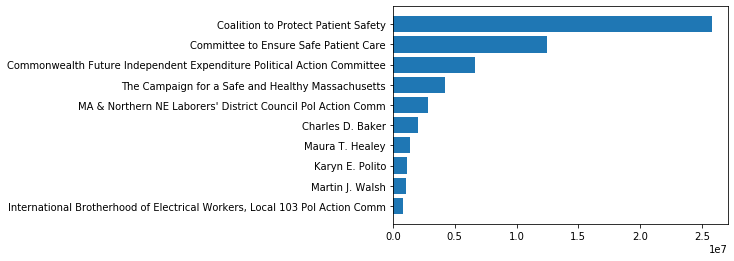

In [145]:
names = candidates[:10]['Candidate_Received'].to_numpy()
amounts = candidates[:10]['Amount_Donated'].to_numpy()
fig, ax = plt.subplots()
ax.barh(names, amounts, align='center')
ax.invert_yaxis()
plt.show()

In [141]:
print(candidates.sort_values(['Amount_Donated'], ascending=False)[:20])

                                     Candidate_Received  Amount_Donated
280                 Coalition to Protect Patient Safety    2.580052e+07
292               Committee to Ensure Safe Patient Care    1.250142e+07
295   Commonwealth Future Independent Expenditure Po...    6.630000e+06
1516  The Campaign for a Safe and Healthy Massachusetts    4.249864e+06
918   MA & Northern NE Laborers' District Council Po...    2.799180e+06
227                                    Charles D. Baker    2.056750e+06
1062                                    Maura T. Healey    1.410389e+06
806                                     Karyn E. Polito    1.129552e+06
1014                                    Martin J. Walsh    1.062464e+06
589   International Brotherhood of Electrical Worker...    8.302209e+05
507                 Freedom for All Massachusetts, Inc.    7.413003e+05
1341                                    Robert A. DeLeo    5.491880e+05
594           Ironworkers Union Local 7 Pol Action Comm    5.429

### Committee Analysis

In [9]:
HealthcareFinancingCommittee = pd.read_csv('./committee_members/Health Care Financing Comittee.txt', header = None, names = ['HFC'])
MSRCommittee = pd.read_csv('./committee_members/Mental Health, Substance Use and Recovery Comittee.txt', header = None, names = ['MSR'])
PublicHealthCommittee = pd.read_csv('./committee_members/Public Health Comittee.txt', header = None, names = ['PHC'])
CommitteeDetails = pd.DataFrame(columns = ['MemberName', 'CommitteeNames'])
CommitteeDetails["MemberName"] = pd.concat([HealthcareFinancingCommittee["HFC"], MSRCommittee["MSR"], PublicHealthCommittee["PHC"]])
CommitteeDetails = CommitteeDetails.drop_duplicates()

In [10]:
for index,member in enumerate(CommitteeDetails['MemberName']):
    committees = []
    if HealthcareFinancingCommittee["HFC"].str.contains(member).sum():
        committees.append("Healthcare Financing Committee")
    if MSRCommittee["MSR"].str.contains(member).sum():
        committees.append("Mental health and Recovery Committee")
    if PublicHealthCommittee["PHC"].str.contains(member).sum():
        committees.append("Public Health Committee")
    CommitteeDetails.iloc[index]['CommitteeNames'] = committees

In [107]:
CommitteeDetails.to_csv('./committee_members/CommitteeDetails.csv', index = False)

In [40]:
CommitteeDetails = pd.read_csv('./committee_members/CommitteeDetails.csv')

In [170]:
total_donated = updated_df.groupby(['Full_Name'], as_index=False).sum().sort_values(['Amount'], ascending=False)

In [160]:
names = []
for index, row in CommitteeDetails.iterrows():
    names.append(row['MemberName'])

In [161]:
names

['Adam G. Hinds',
 'Julian Cyr',
 'Mark C. Montigny',
 'Joseph A. Boncore',
 'Dean A. Tran',
 'Brian M. Ashe',
 'Christine P. Barber',
 'Steven Ultrino',
 'Joseph W. McGonagle',
 'William J. Driscoll',
 'Natalie M. Higgins',
 'Brian W. Murray',
 'Jon Santiago',
 'Randy Hunt',
 'Mathew J. Muratore',
 'Cindy F. Friedman',
 'Harriette L. Chandler',
 'Daniel R. Cullinane',
 'Walter F. Timilty',
 'Brendan P. Crighton',
 'Joanne M. Comerford',
 "Patrick M. O'Connor",
 'Angelo M. Scaccia',
 'Carolyn C. Dykema',
 'Daniel J. Ryan',
 'Daniel R. Carey',
 'Tami L. Gouveia',
 'Tram T. Nguyen',
 'Susannah M. Whipps',
 'William L. Crocker',
 'Alyson M. Sullivan',
 'John F. Keenan',
 'Marjorie C. Decker',
 'José F. Tosado']

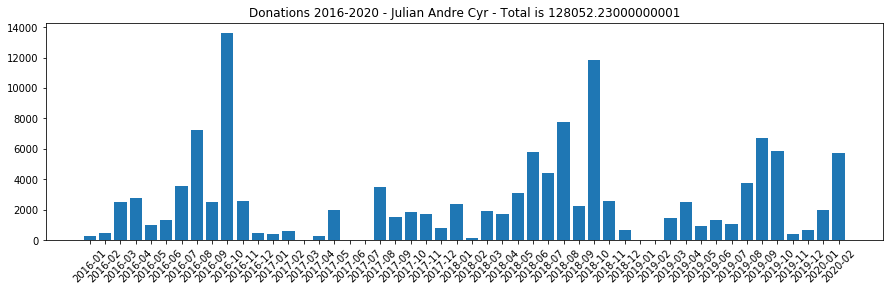

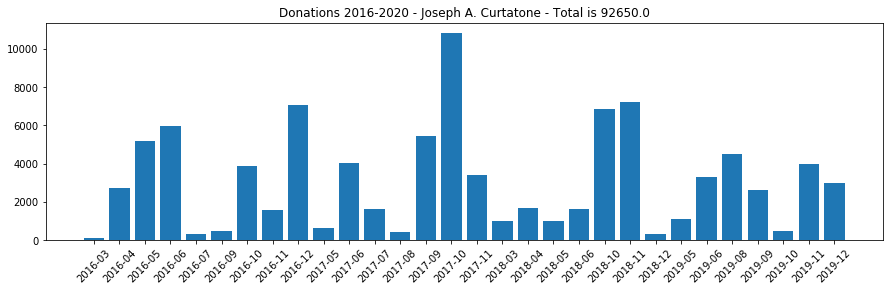

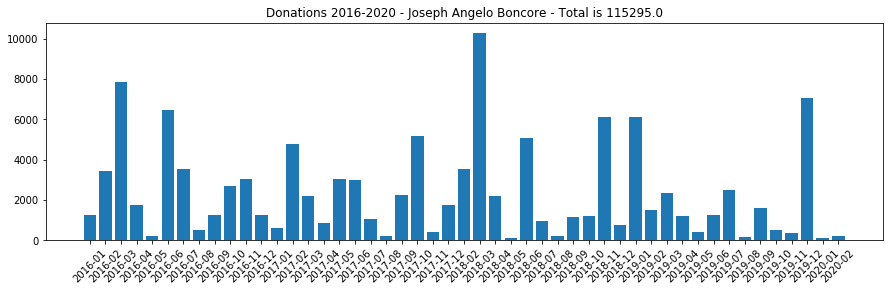

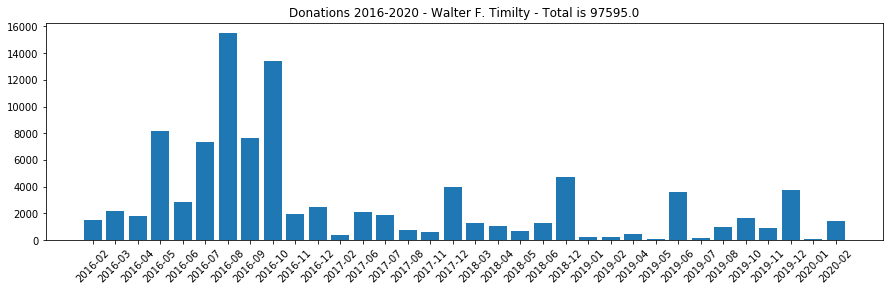

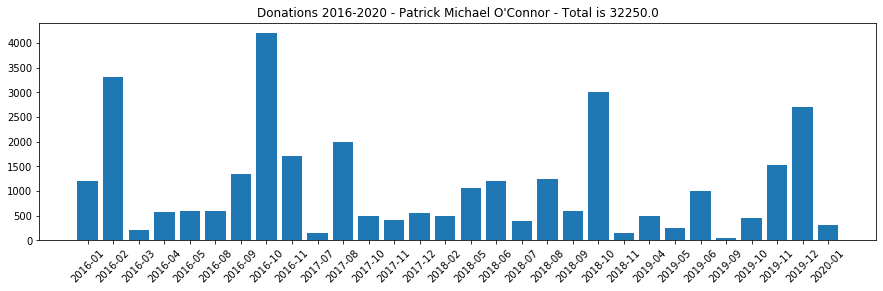

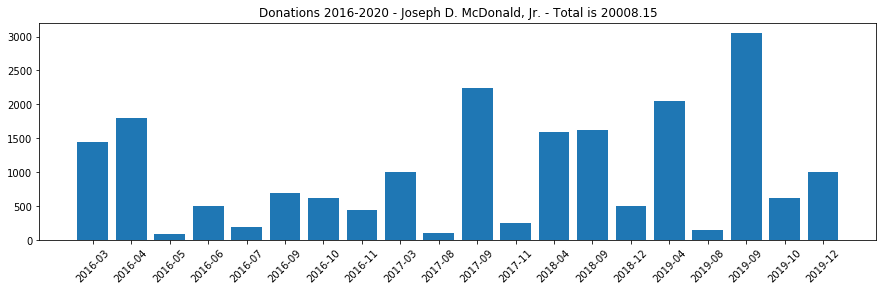

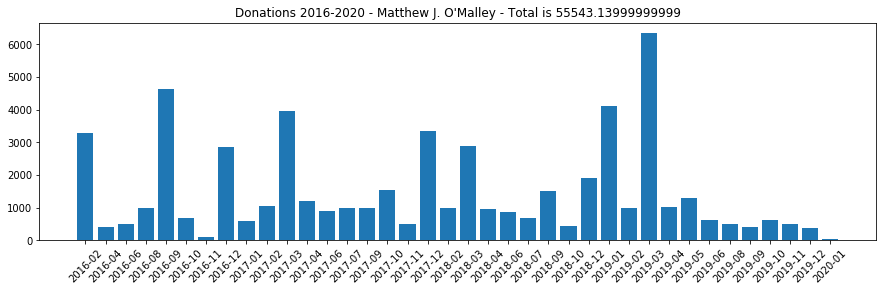

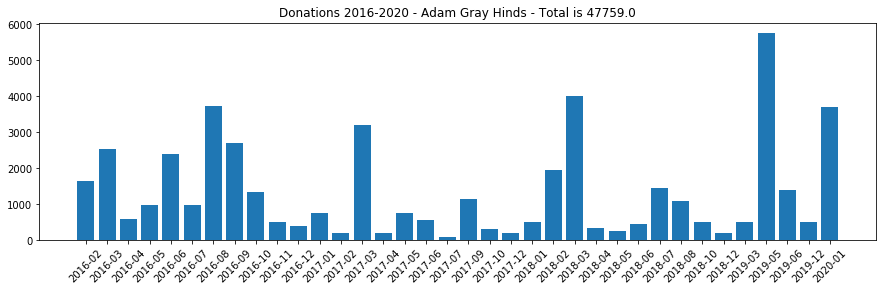

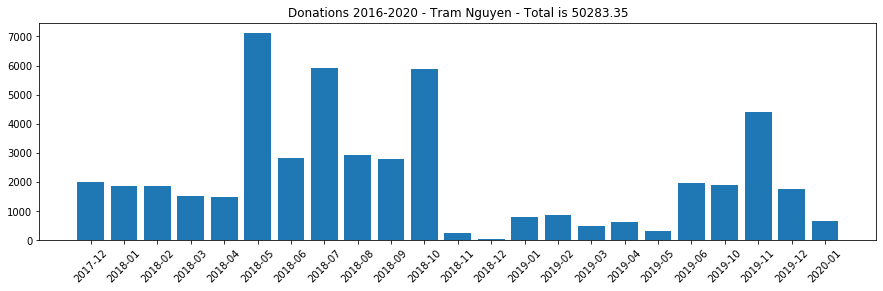

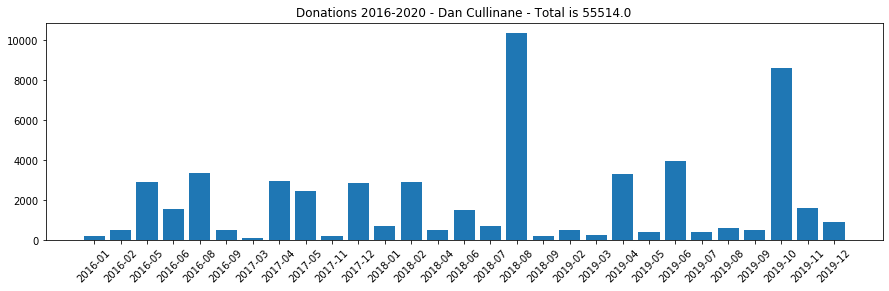

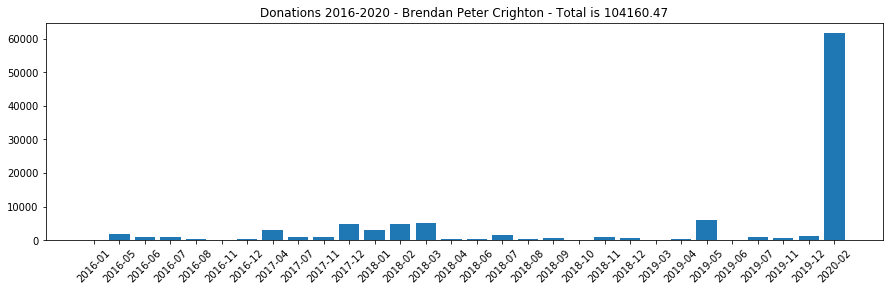

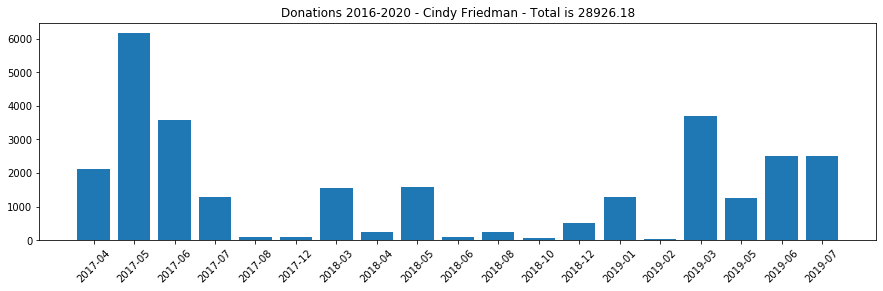

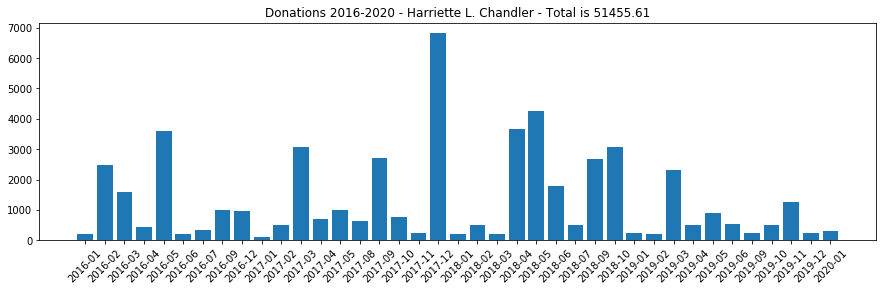

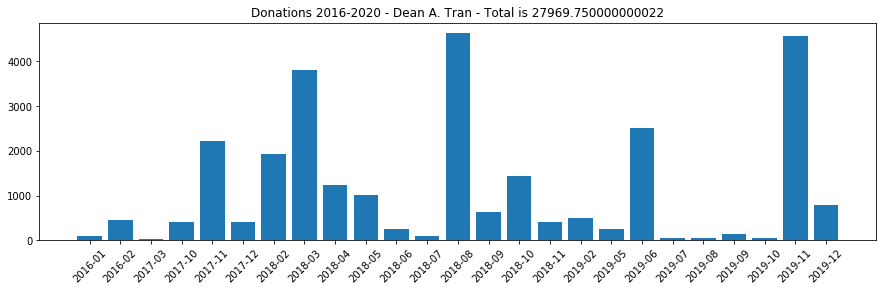

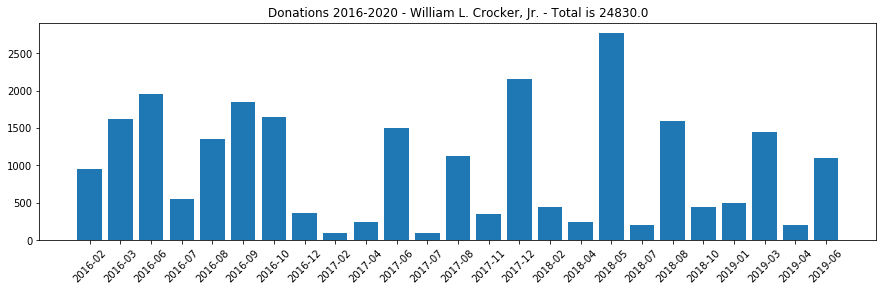

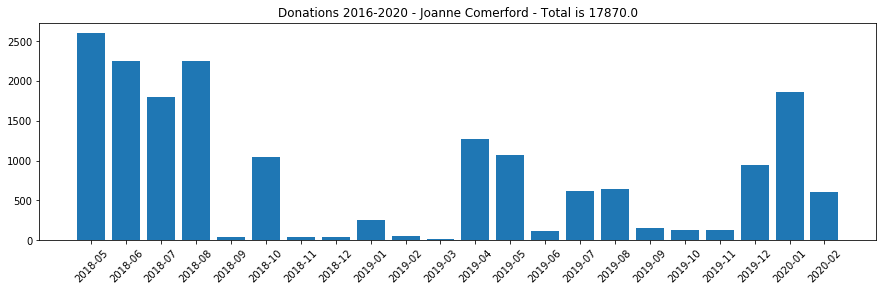

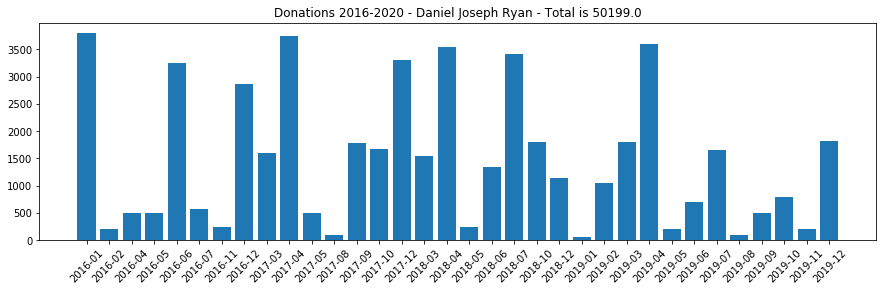

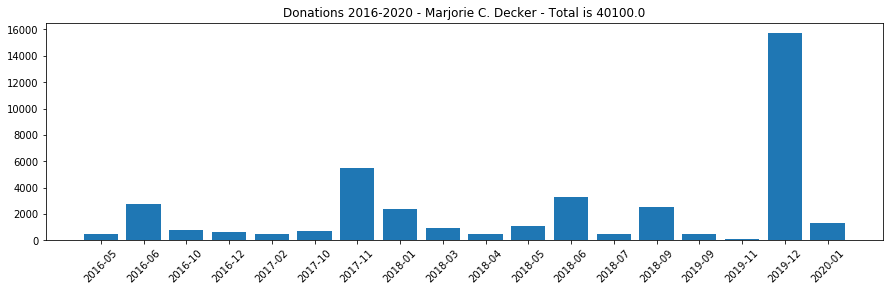

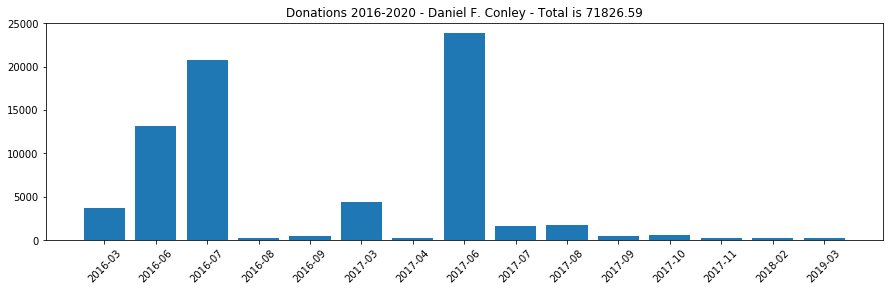

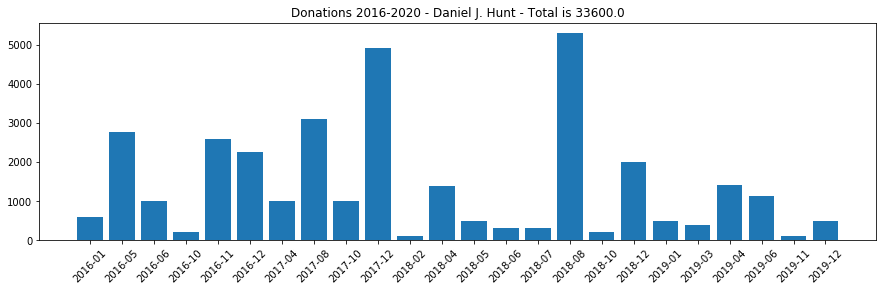

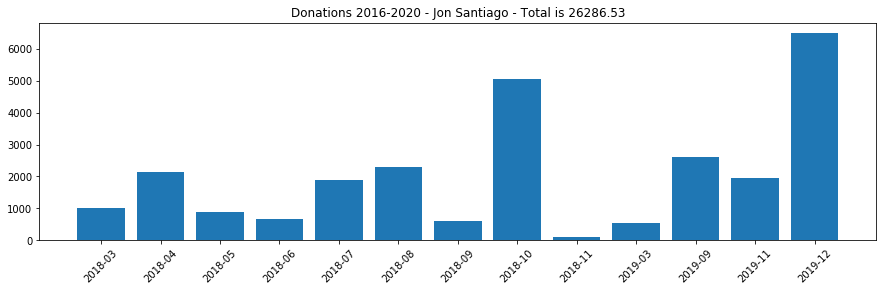

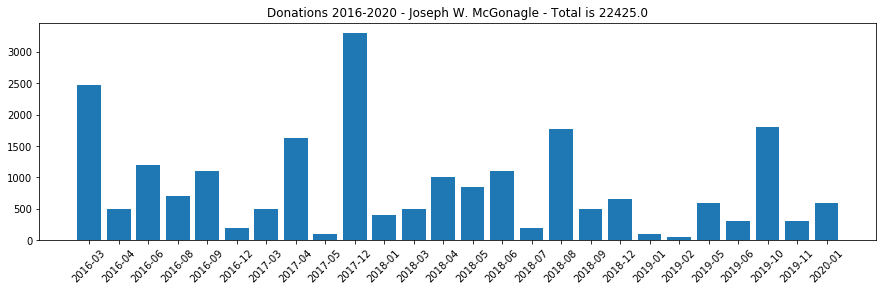

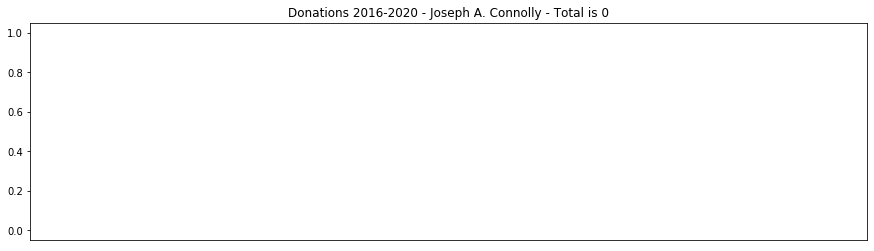

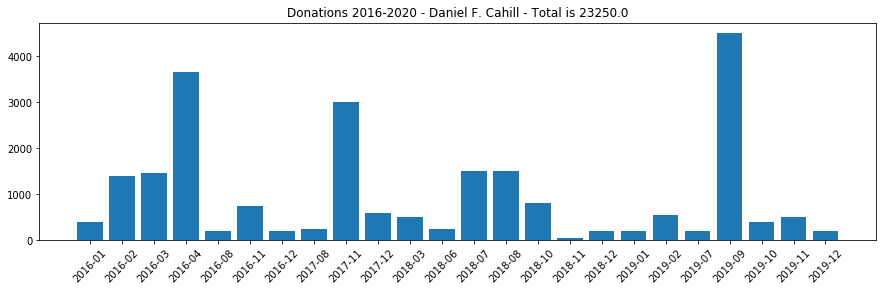

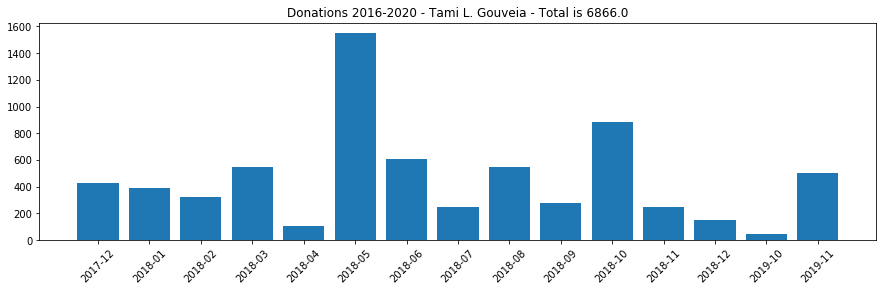

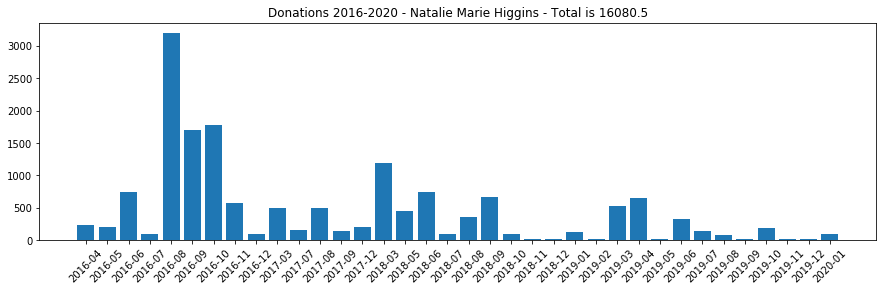

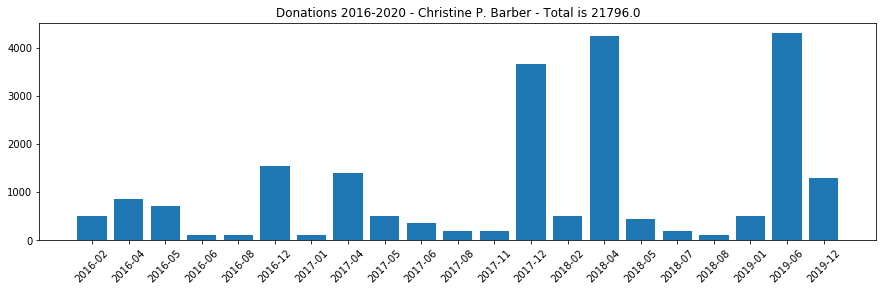

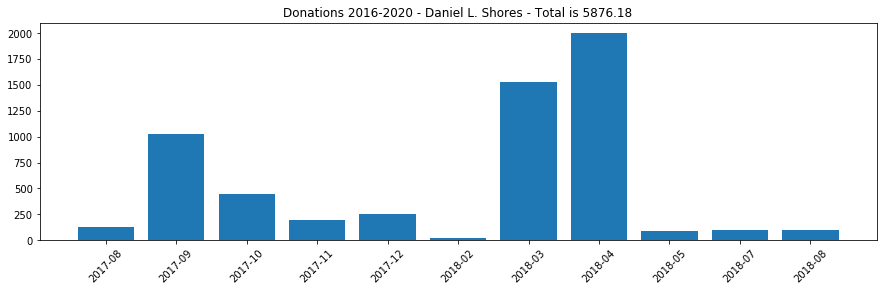

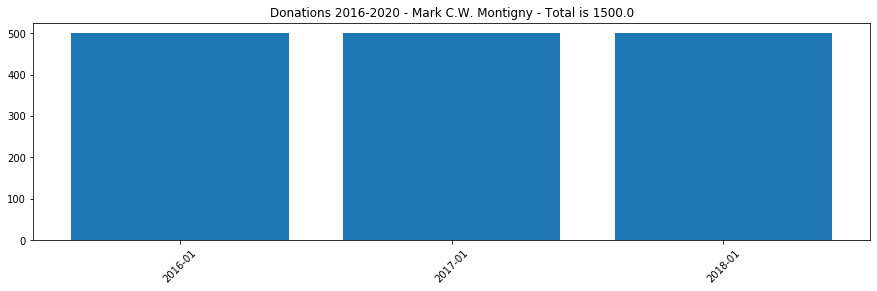

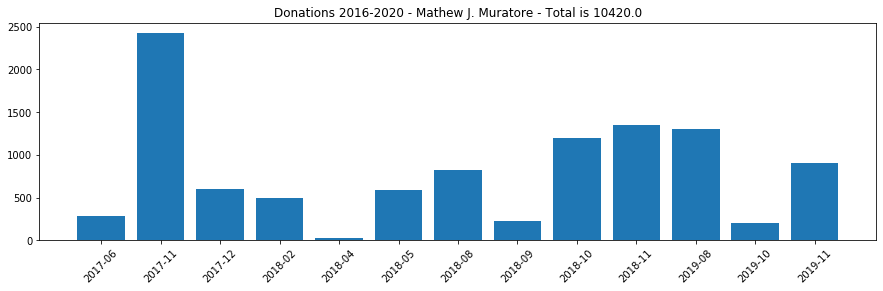

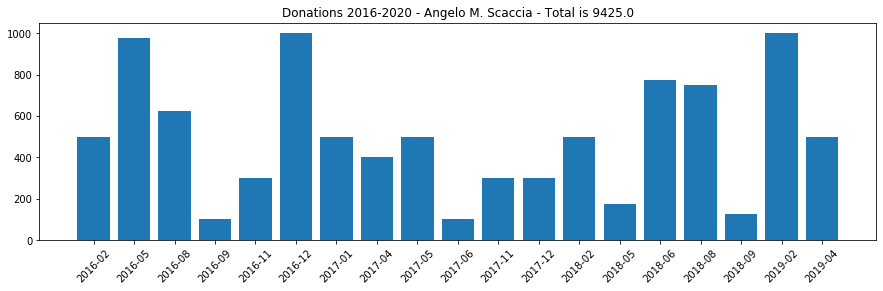

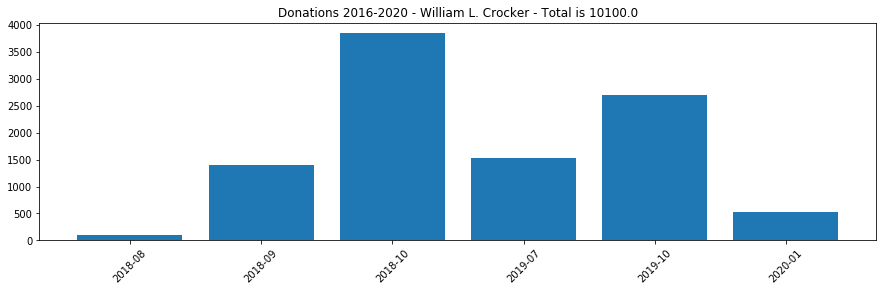

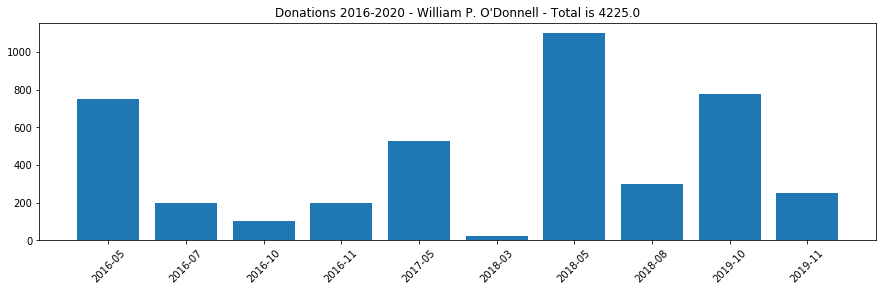

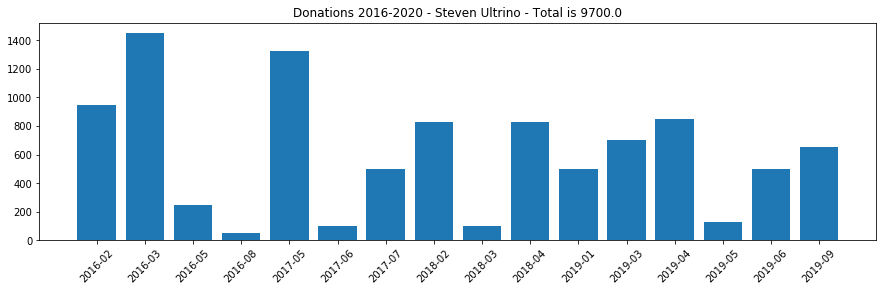

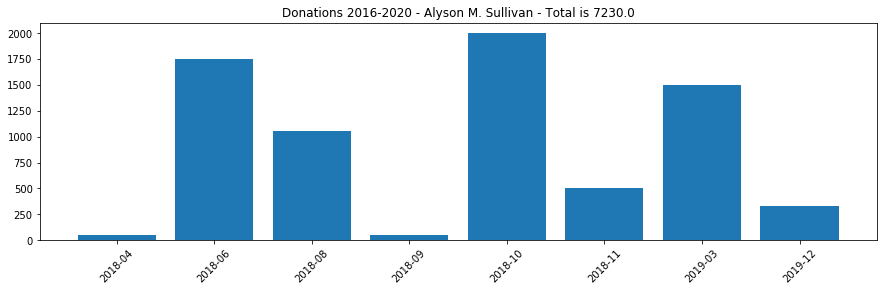

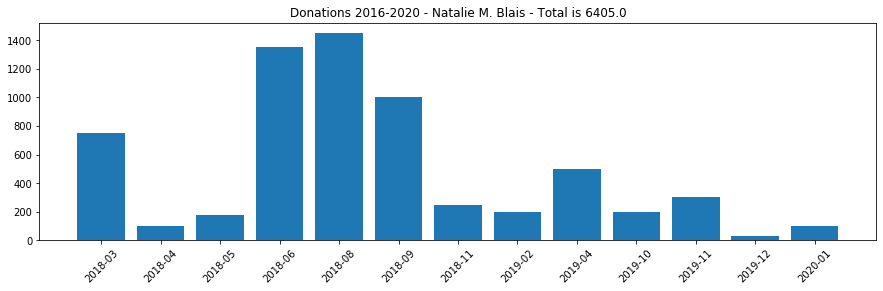

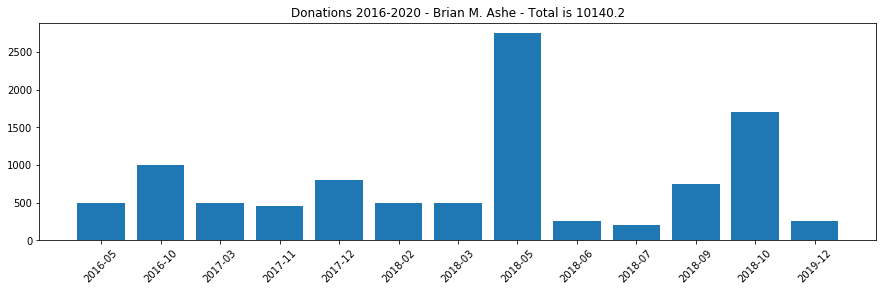

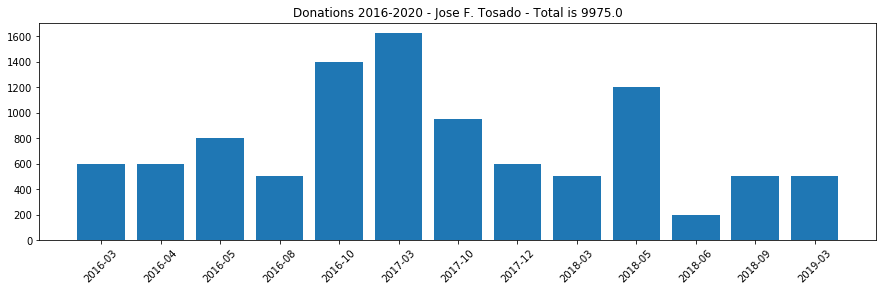

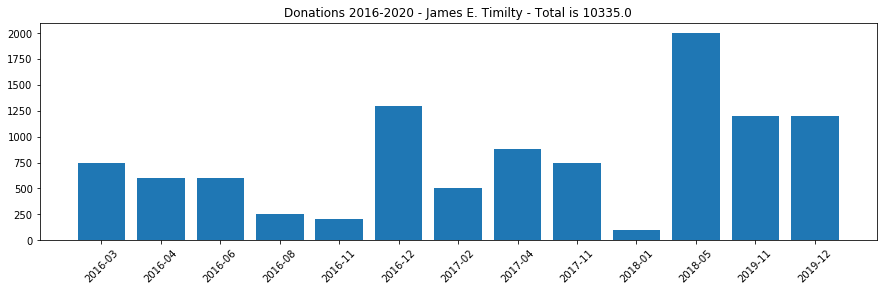

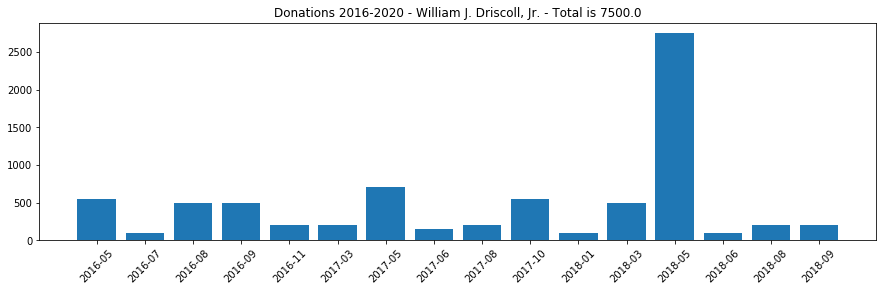

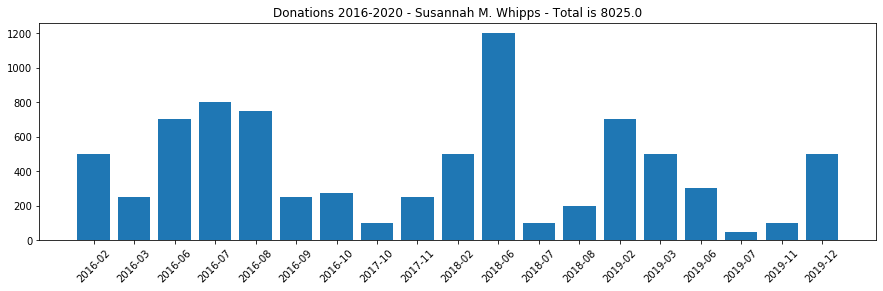

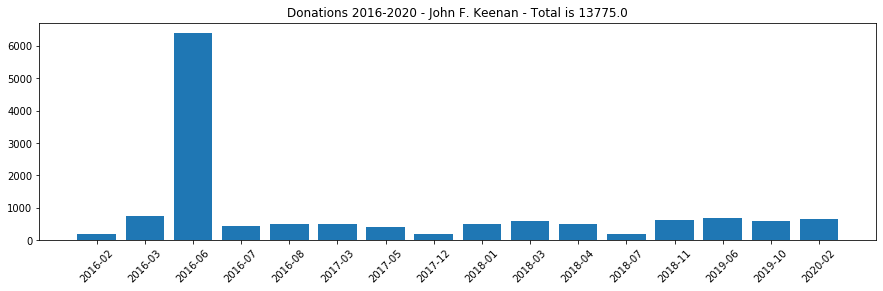

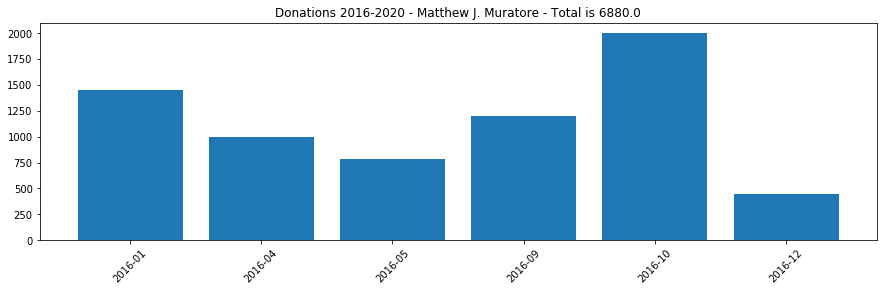

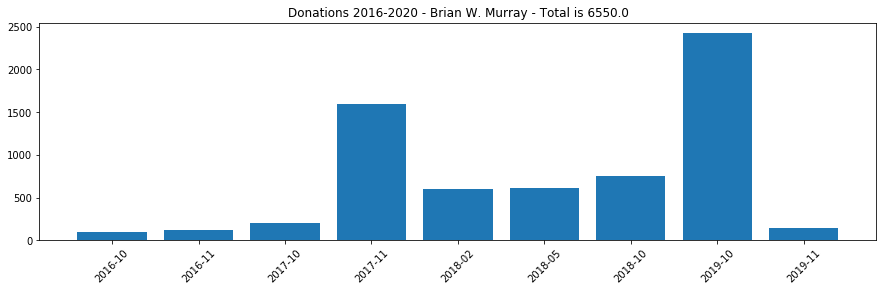

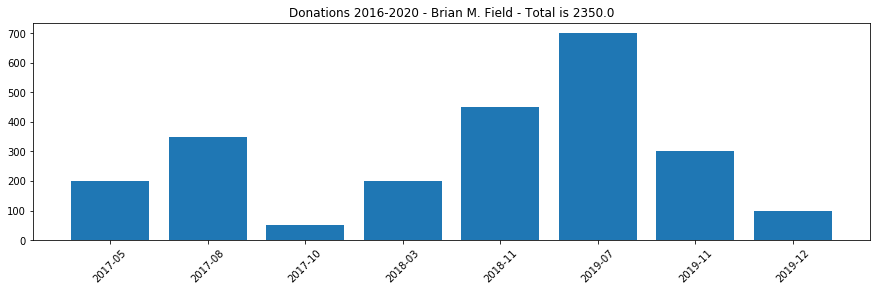

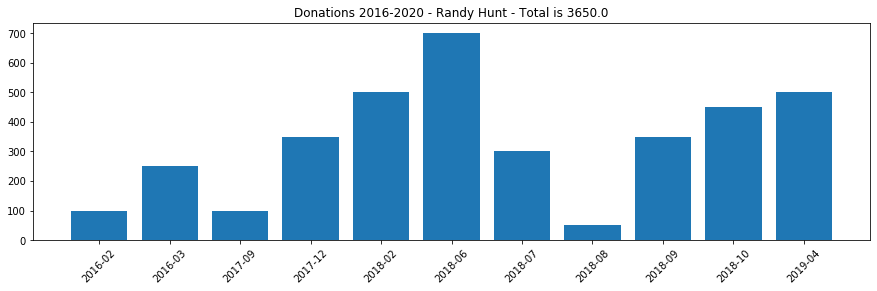

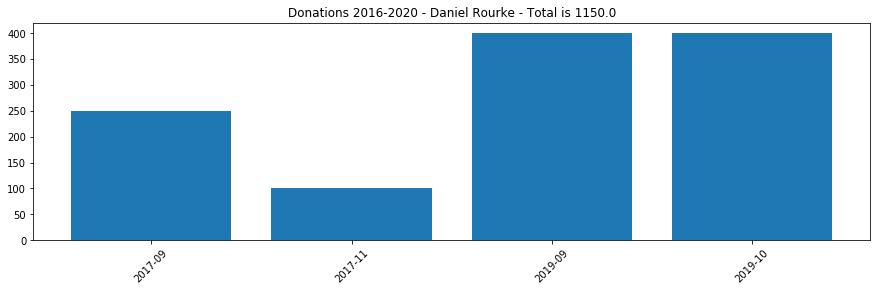

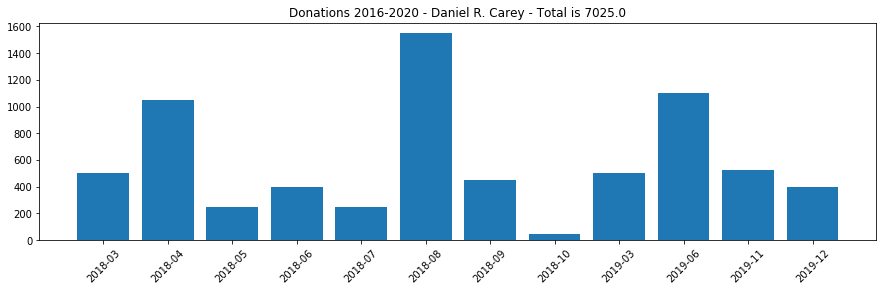

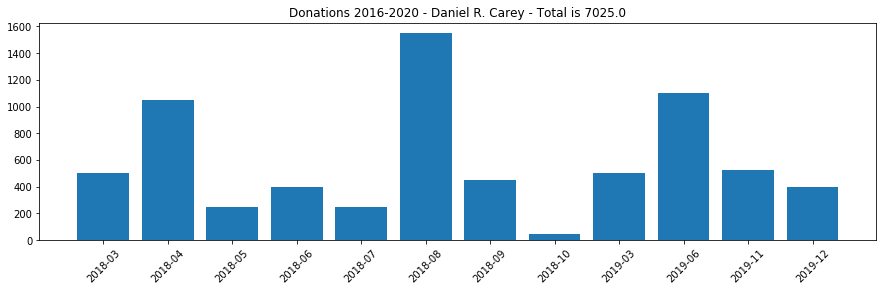

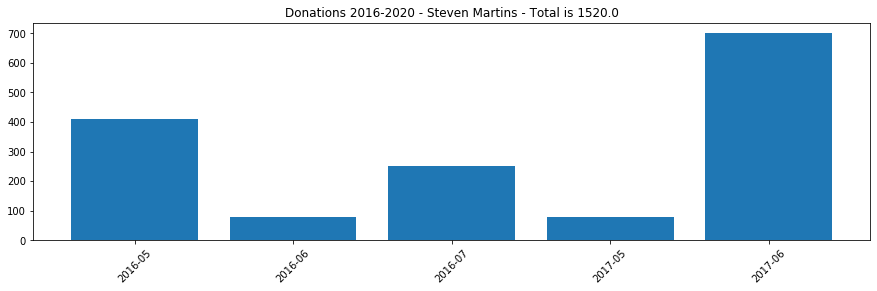

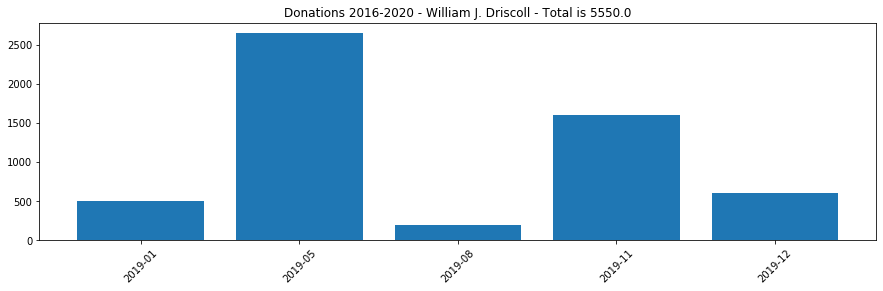

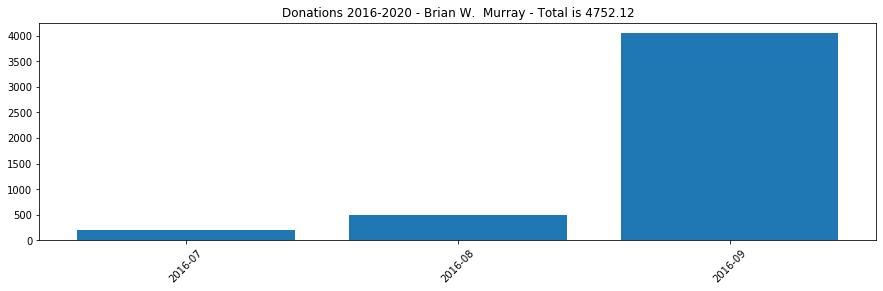

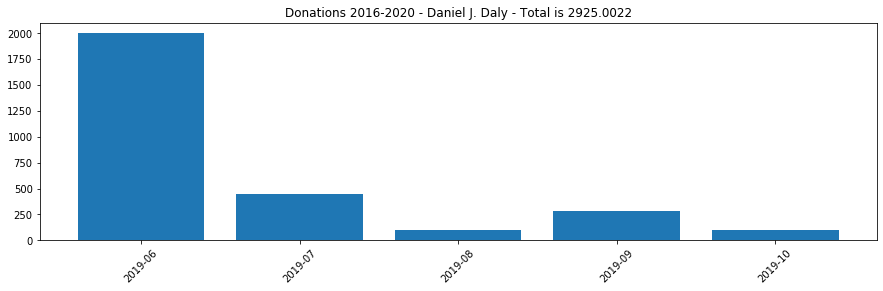

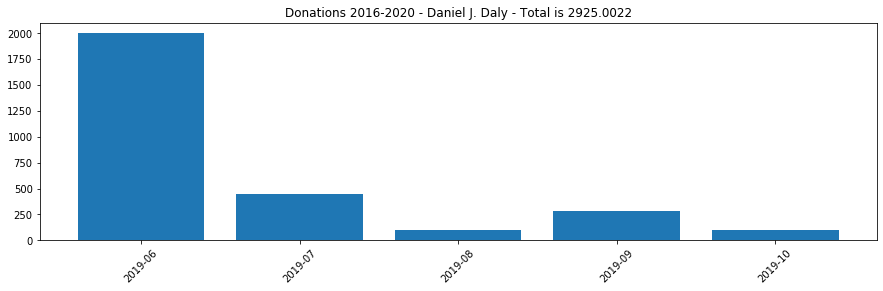

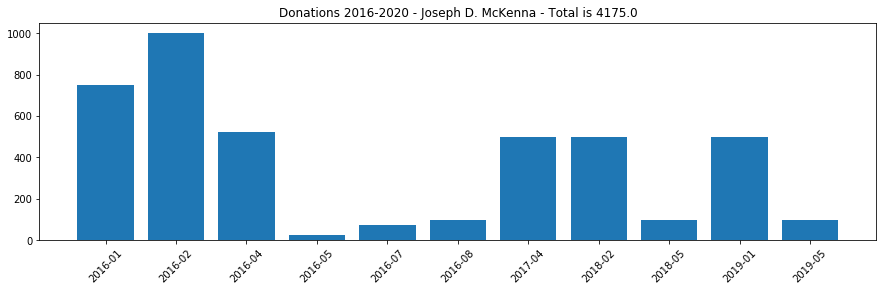

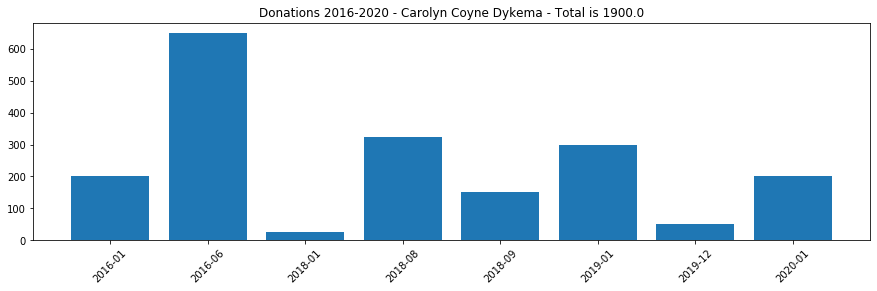

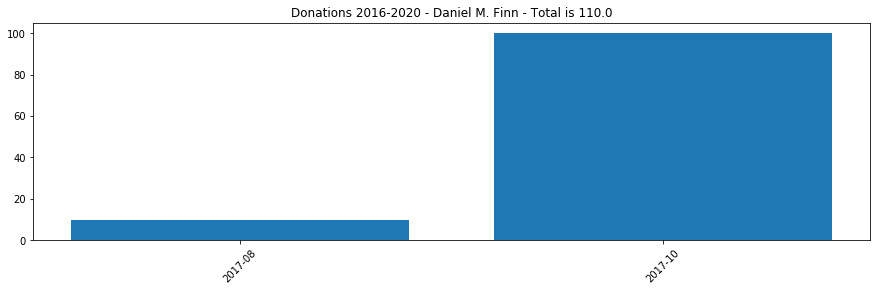

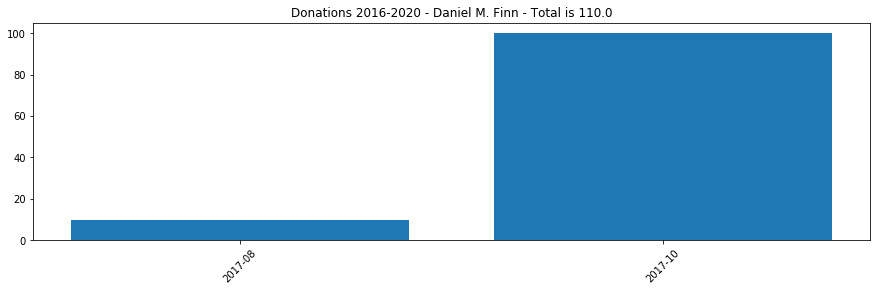

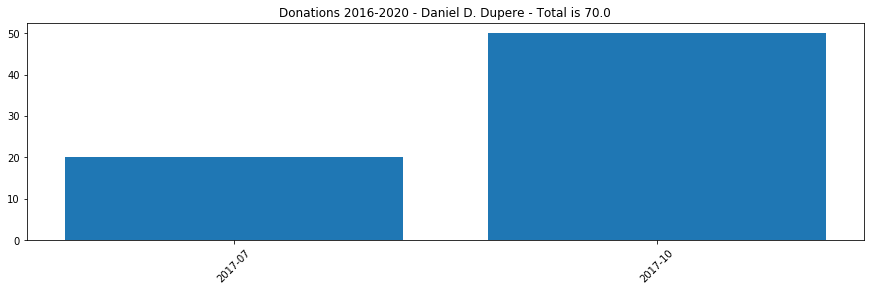

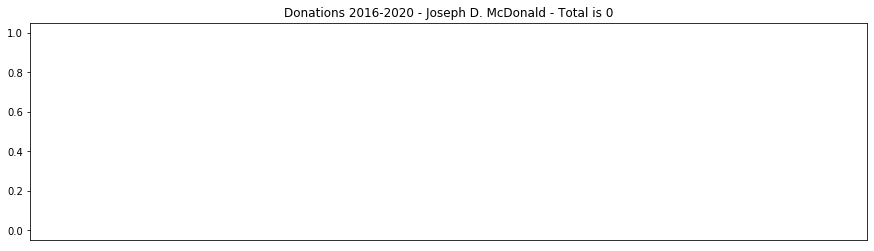

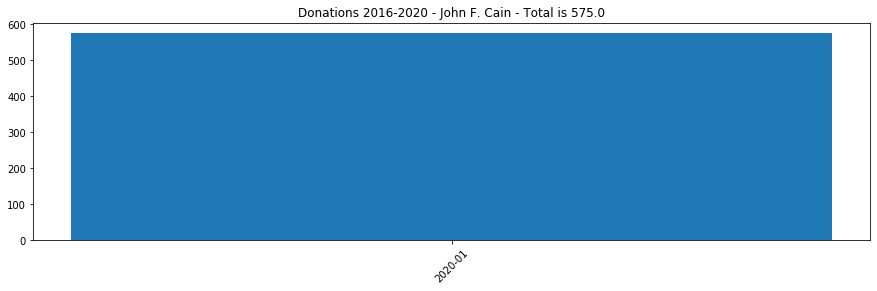

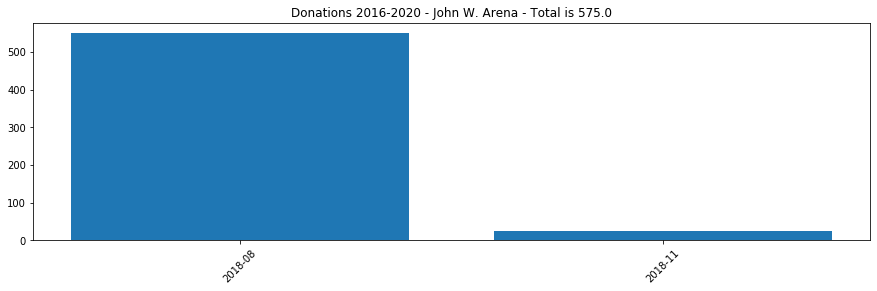

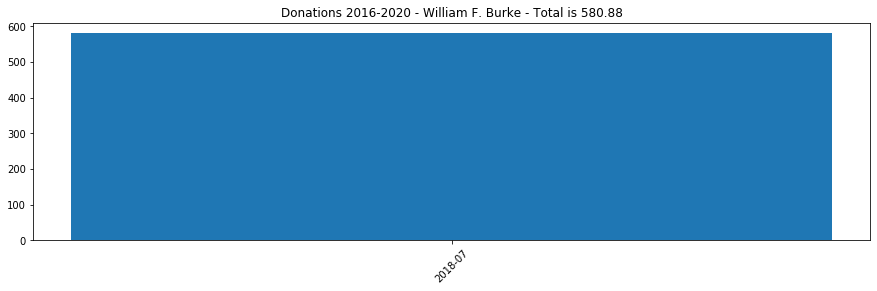

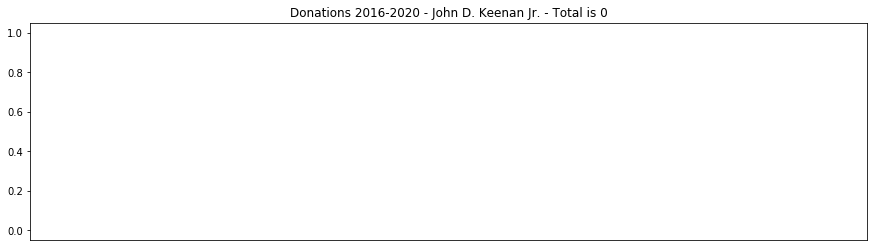

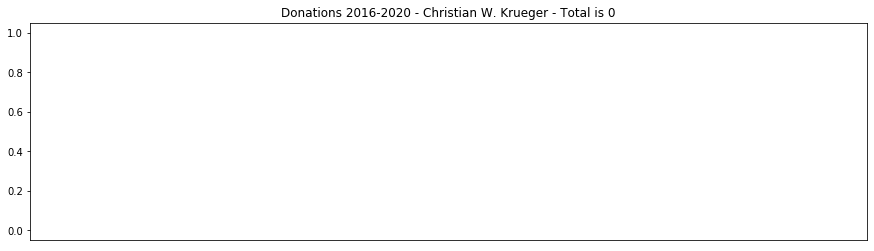

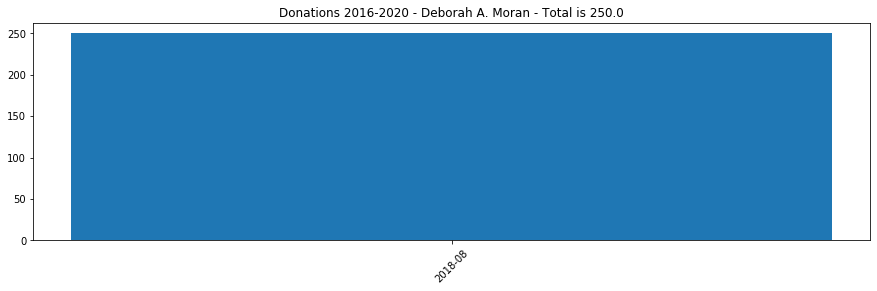

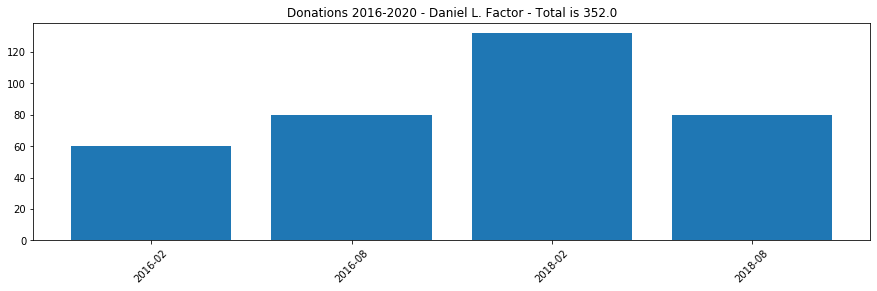

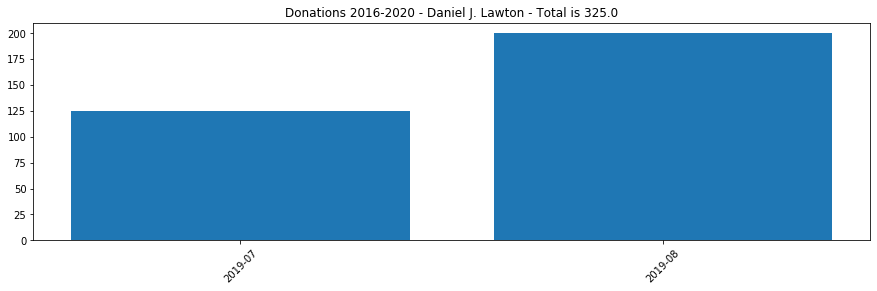

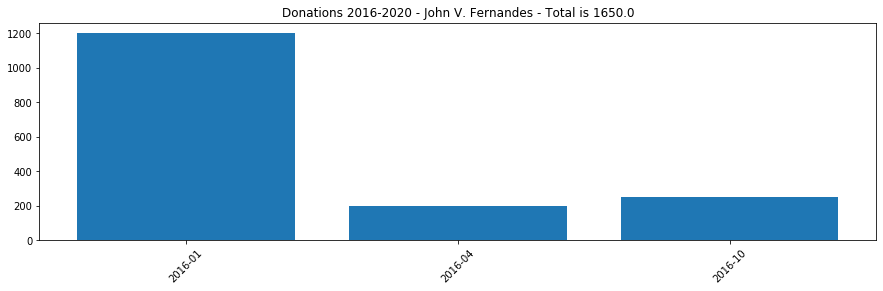

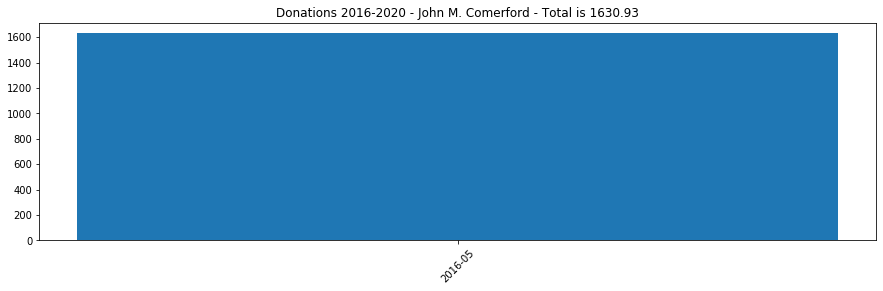

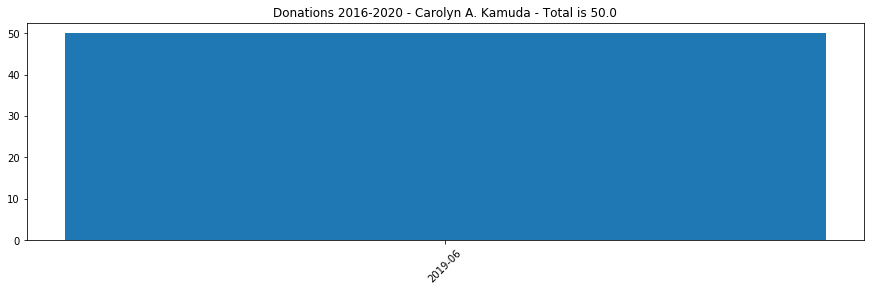

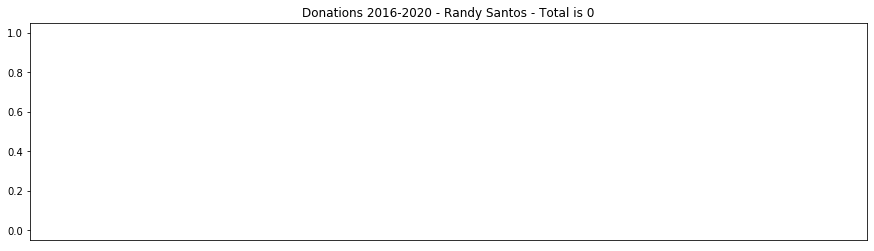

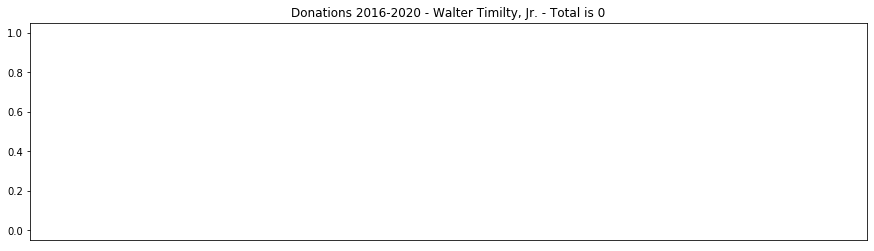

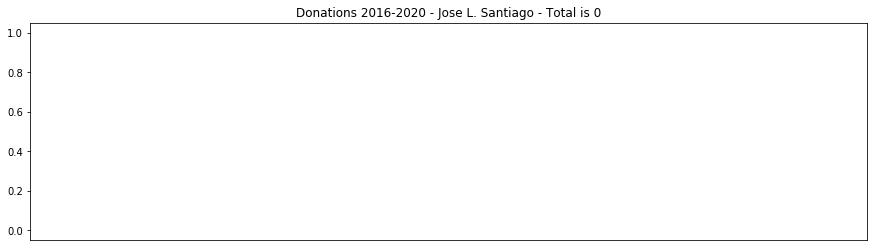

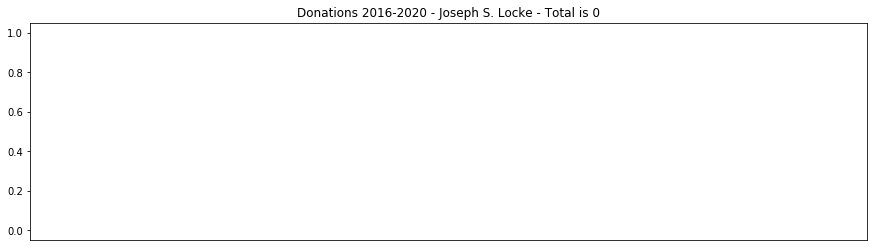

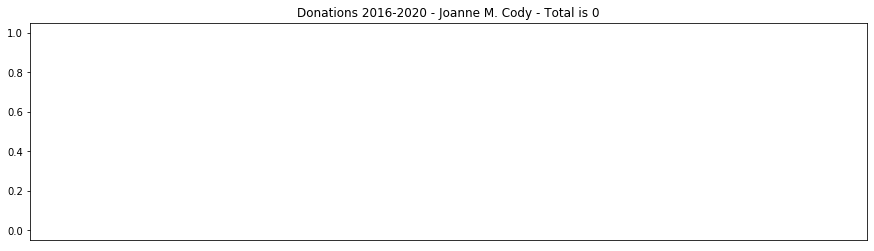

In [179]:
for index, row in total_donated.iterrows():
    for i in names:
        if fuzz.ratio(i, row['Full_Name']) >= 70:
            plot_donations_years(healthcare_data, row['Full_Name'])

### PAC's Analysis

In [46]:
suffix = '_healthcare.txt' #Use this to append a suffix to the keywords file
def get_data(f_name):
    arr = []
    f = open(os.path.join('./keywords', f_name + suffix), 'r')
    for line in f:
        arr.append(line.strip(' \n'))
    f.close()
    return arr
pacs = get_data('pac_keywords')

In [156]:
print(pacs)

['CVS Health Massachusetts Political Action Committee', 'MA Association of Community Health PAC', 'MA Pol Action Comm for Radiological Health Care', 'Massachusetts Health and Hospital Association Political Action Committee (MHAPAC)', 'Tenet Healthcare Corporation Political Action Committee Massachusetts', '1199 SEIU MA PAC', 'Anesthesiologists Pol Action Comm. (APAC)', 'Chiropractic Pac of Ma', "Local 509 Service Employees Int'l Union Comm on Pol Ed MA Workers' Pol Action Comm", 'MA Assisted Living Assoc. PAC', 'Ma Assoc For Psychiatry Pol Action Comm', 'MA Assoc. of Nursing Homes Education & Pol. Action Comm', 'MA Association of Advanced Practice Psychiatric Nurses Political Action Committee', 'MA Association of Community Health PAC', 'MA Coalition of Nurse Practitioners PAC', 'Ma Hospital Assoc Pol Action Comm', 'Ma Optometric Pol Action Comm', 'MA Orthopedic Assoc. Pol Action Comm', 'MA Pace Social Workers Political Action Committee', 'MA Podiatric PAC', 'Ma Pol Action Comm For Radi

In [47]:
def check_pacs(df_val, ignore=None):
    if type(df_val) != str:
        return False
    df_val = df_val.lower()
    if ignore != None:
        for x in ignore:
            if x in df_val:
                return False
    for x in pacs:
        x = x.lower()
        r = fuzz.ratio(x, df_val)
        if r >= 90:
            return True
    return False
pac_data = healthcare_data[healthcare_data['Last_Name'].apply(check_pacs)]

In [130]:
pac_data_grouped = pac_data.groupby(['Last_Name'], as_index=False).sum().sort_values(['Amount'], ascending=False)[:20]

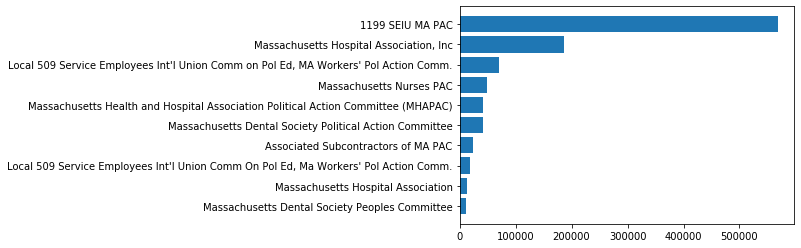

In [131]:
names = pac_data_grouped[:10]['Last_Name'].to_numpy()
amounts = pac_data_grouped[:10]['Amount'].to_numpy()
fig, ax = plt.subplots()
ax.barh(names, amounts, align='center')
ax.invert_yaxis()
plt.show()

### PAC's to state reps

In [134]:
pac_to_rep = healthcare_data[healthcare_data['Full_Name'].apply(check_reps) & healthcare_data['Last_Name'].apply(check_pacs)]
pac_to_rep.groupby(['Last_Name'], as_index=False).sum().sort_values(['Amount'], ascending=False)[:20]

,Last_Name,Unnamed: 0,Unnamed: 0.1,ID,Report_ID,Contributor_ID,Amount,Report_Year,CPF_ID
1,1199 SEIU MA PAC,43129619,43129619,1040755852,54162027,5976906.0,40550.0,165426,1189833
42,Massachusetts Health and Hospital Association ...,41382000,41382000,829119740,43608695,5139968.0,19925.0,129150,873172
39,Massachusetts Dental Society Political Action ...,23807701,23807701,525480515,27506916,3283936.0,19750.0,82723,580959
11,Local 509 Service Employees Int'l Union Comm o...,33438188,33438188,754755639,39456780,4572768.0,16800.0,119035,883386
50,Massachusetts Nurses PAC,31373160,31373160,783191985,40745432,4886649.0,16750.0,125078,920902
3,Associated Subcontractors of MA PAC,16392096,16392096,497215028,25678051,3227400.0,8250.0,80685,545757
10,Local 509 Service Employees Int'l Union Comm O...,12250562,12250562,315720242,16423230,1845152.0,8200.0,50427,360557
38,Massachusetts Dental Society Peoples Committee,9643529,9643529,170948620,9026776,805370.0,6250.0,26239,167260
16,MA Association of Community Health PAC,19579246,19579246,389193097,20455221,2258928.0,5650.0,60540,434080
23,MA Pol Action Comm for Radiological Health Care,12982160,12982160,235650372,12442935,1441674.0,5100.0,36329,238872


In [139]:
healthcare_data[healthcare_data['Last_Name'] == "1199 SEIU MA PAC"].sort_values(['Amount'], ascending=False)[:10]

,Unnamed: 0,Unnamed: 0.1,ID,Report_ID,Date,Contributor_Type,First_Name,Last_Name,Address,City,...,Zip,Occupation,Employer,Contributor_ID,Amount,Full_Name,Comm_Name,Report_Year,CPF_ID,Filing_Date


### PAC's to all

In [50]:
pac_to_all = pac_data
pac_to_all.groupby(['Last_Name'], as_index=False).apply(lambda x: x).sort_values(['Amount'], ascending=False)[:20]

,Unnamed: 0,Unnamed: 0.1,ID,Report_ID,Date,Contributor_Type,First_Name,Last_Name,Address,City,...,Zip,Occupation,Employer,Contributor_ID,Amount,Full_Name,Comm_Name,Report_Year,CPF_ID,Filing_Date
61641,387385,387385,12410937,642956,2017-09-01,Committee,NaN,1199 SEIU MA PAC,330 W 42 Street 7th floor,New York,...,10036,NaN,NaN,80769.0,100000.00,"Freedom for All Massachusetts, Inc.","Freedom for All Massachusetts, Inc.",2017,95442,2018-01-22 15:01:33.293
10772,85097,85097,11717712,585202,2016-04-12,OTHER,NaN,"Massachusetts Hospital Association, Inc",500 District Ave.,Burlington,...,01803,NaN,NaN,NaN,100000.00,Committee to Protect Massachusetts Hospital Care,Committee to Protect Massachusetts Hospital Care,2016,95432,2016-09-20 16:37:10.860
34351,167377,167377,11934973,599839,2016-02-10,Committee,NaN,1199 SEIU MA PAC,330 W 42 Street 7th floor,New York,...,10036,NaN,NaN,80769.0,100000.00,Raise Up Massachusetts 2018,Raise Up Massachusetts 2018,2016,95418,2017-01-27 17:20:25.773
10773,85098,85098,11717713,585202,2016-04-27,OTHER,NaN,"Massachusetts Hospital Association, Inc",500 District Ave.,Burlington,...,01803,NaN,NaN,NaN,75000.00,Committee to Protect Massachusetts Hospital Care,Committee to Protect Massachusetts Hospital Care,2016,95432,2016-09-20 16:37:10.860
106116,625460,625460,12986286,684279,2018-07-12,Committee,NaN,1199 SEIU MA PAC,330 W 42 Street 7th floor,New York,...,10036,NaN,NaN,80769.0,50000.00,Raise Up Massachusetts 2018,Raise Up Massachusetts 2018,2018,95418,2019-01-16 10:31:29.920
274791,1015564,1015564,13649599,727868,2019-05-10,Committee,NaN,1199 SEIU MA PAC,330 W 42 Street 7th floor,New York,...,10036,NaN,NaN,80769.0,50000.00,Raise Up Massachusetts 2022,Raise Up Massachusetts 2022,2019,95463,2020-01-21 17:15:59.047
11624,94854,94854,11740151,587009,2016-10-01,Committee,NaN,1199 SEIU MA PAC,330 W 42 Street 7th floor,New York,...,10036,NaN,NaN,80769.0,50000.00,Raise Up Together Independent Expenditure Poli...,Raise Up Together Independent Expenditure Poli...,2016,80969,2016-10-11 10:09:41.637
60497,379072,379072,12380057,641944,2017-04-24,Committee,NaN,1199 SEIU MA PAC,330 W 42 Street 7th floor,New York,...,10036,NaN,NaN,80769.0,50000.00,Raise Up Massachusetts 2018,Raise Up Massachusetts 2018,2017,95418,2018-01-18 16:42:01.690
274792,1015565,1015565,13649600,727868,2019-12-11,Committee,NaN,1199 SEIU MA PAC,"330 West 42 Street, 7th Fl.",New York,...,10036,NaN,NaN,80769.0,25000.00,Raise Up Massachusetts 2022,Raise Up Massachusetts 2022,2019,95463,2020-01-21 17:15:59.047
10775,85100,85100,11717725,585202,2016-09-16,OTHER,NaN,"Massachusetts Hospital Association, Inc",500 District Ave.,Burlington,...,01803,NaN,NaN,NaN,10947.55,Committee to Protect Massachusetts Hospital Care,Committee to Protect Massachusetts Hospital Care,2016,95432,2016-09-20 16:37:10.860
